In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Esplorazione del dataset

In [2]:
df = pd.read_csv("../data/processed/GOOGL.csv")

df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data/processed/GOOGL.csv'

In [4]:
df.drop(0) # Elimino il primo record che contiene i metadati

,Price,Date,Open,High,Low,Close,Volume,log_returns
1,2,2020-02-28,63.48535365075221,66.88004494343048,63.18145503464202,66.72062683105469,80198000,0.018311
2,3,2020-03-02,67.32544584408515,69.1229231286208,66.02067405586332,69.06563568115234,55430000,0.034543
3,4,2020-03-03,69.63158946211831,70.15518886051058,66.2219446617251,66.64441680908203,56602000,-0.035686
4,5,2020-03-04,67.70256753542472,68.88926748762059,66.6085339749811,68.83048248291016,47598000,0.032275
5,6,2020-03-05,67.03449374191095,67.4370414491301,64.84692814514692,65.50055694580078,54380000,-0.049588
...,...,...,...,...,...,...,...,...
1225,1252,2025-02-19,184.07000732421875,185.4600067138672,183.58999633789062,185.27000427246094,19549400,0.008129
1226,1253,2025-02-20,184.8000030517578,185.30999755859375,182.72000122070312,184.55999755859375,20441500,-0.003840
1227,1254,2025-02-21,185.14999389648438,185.33999633789062,179.0800018310547,179.66000366210938,35199200,-0.026908
1228,1255,2025-02-24,181.99000549316406,183.1199951171875,178.88999938964844,179.25,29854200,-0.002285


In [5]:
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'log_returns']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

df['Date'] = pd.to_datetime(df['Date'])

#### Statistiche descrittive

In [6]:
print(f"Dimensione del dataset: {df.shape}")

Dimensione del dataset: (1230, 8)


In [7]:
print(f"Tipi di dato: {df.dtypes}")

Tipi di dato: Price                  object
Date           datetime64[ns]
Open                  float64
High                  float64
Low                   float64
Close                 float64
Volume                float64
log_returns           float64
dtype: object


In [8]:
print(f"Descrizione del dataset: {df.describe()}")

Descrizione del dataset:                                 Date         Open         High          Low  \
count                           1229  1229.000000  1229.000000  1229.000000   
mean   2022-08-29 20:04:29.487388160   122.625644   124.029901   121.327326   
min              2020-02-28 00:00:00    52.627720    53.152817    50.261298   
25%              2021-06-03 00:00:00    97.406895    99.170499    96.360687   
50%              2022-08-25 00:00:00   122.436156   123.880924   121.394428   
75%              2023-11-28 00:00:00   142.820261   143.878421   140.985908   
max              2025-02-25 00:00:00   203.389999   207.050003   202.809998   
std                              NaN    33.380066    33.609145    33.145977   

             Close        Volume  log_returns  
count  1229.000000  1.229000e+03  1229.000000  
mean    122.705363  3.197900e+07     0.000830  
min      52.516125  9.312000e+06    -0.052882  
25%      97.506538  2.325100e+07    -0.009390  
50%     122.386337  2.8

#### Analisi dei valori mancanti

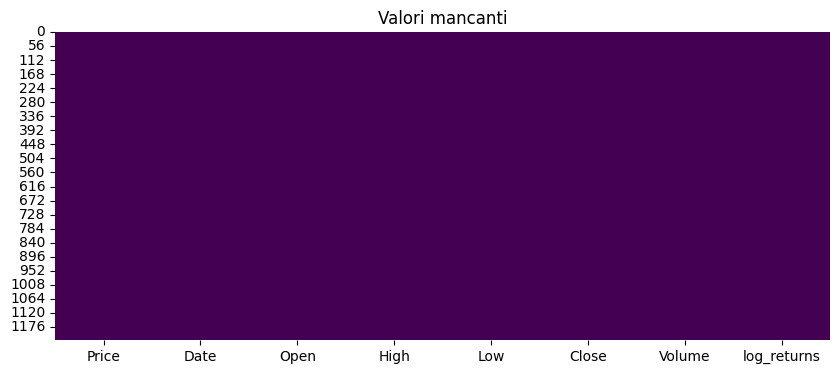

In [9]:
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Valori mancanti')
plt.show()

#### Analisi temporale

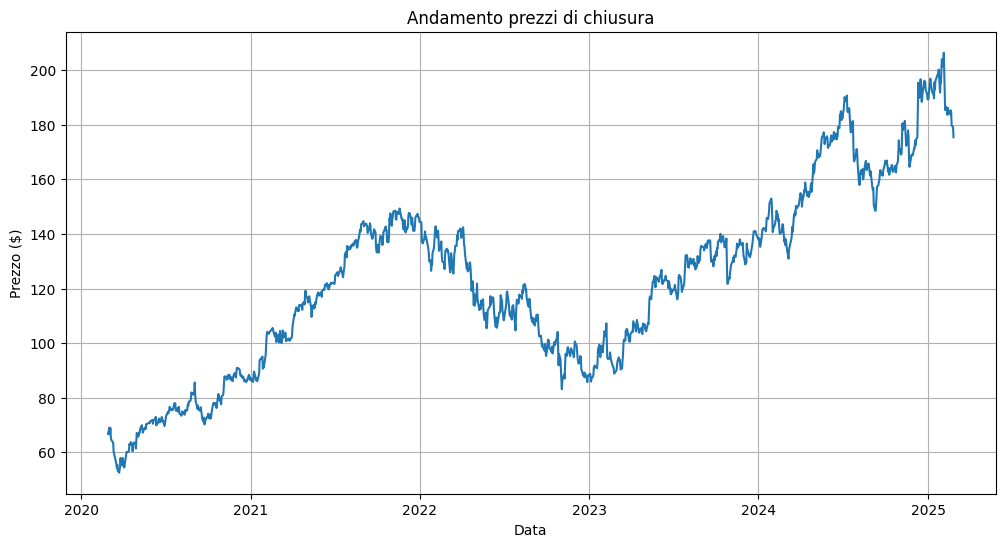

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'])
plt.title('Andamento prezzi di chiusura')
plt.xlabel('Data')
plt.ylabel('Prezzo ($)')
plt.grid(True)
plt.show()

#### Distribuzione dei rendimenti logaritmici

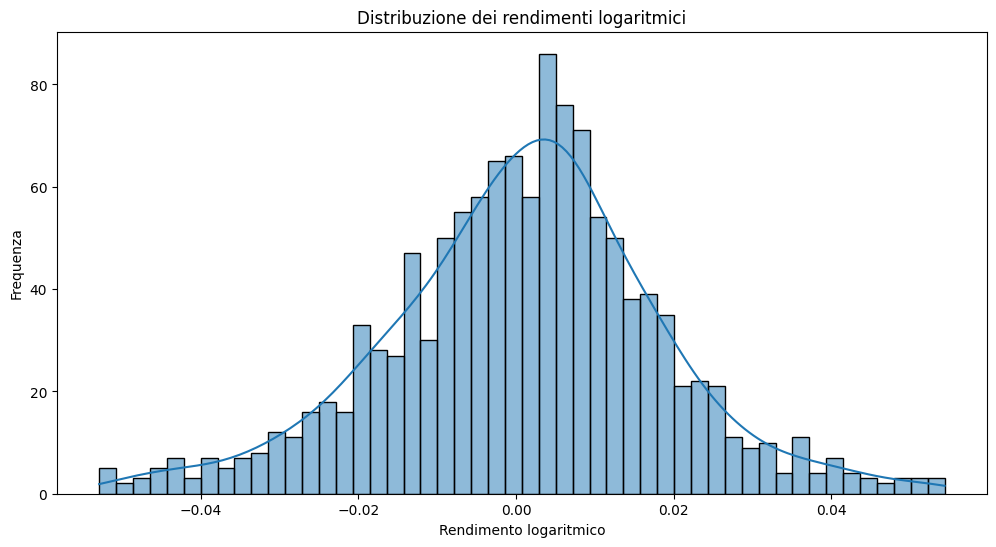

In [11]:
plt.figure(figsize=(12,6))
sns.histplot(df['log_returns'].dropna(), kde=True, bins=50)
plt.title('Distribuzione dei rendimenti logaritmici')
plt.xlabel('Rendimento logaritmico')
plt.ylabel('Frequenza')
plt.show()

#### Correlazioni

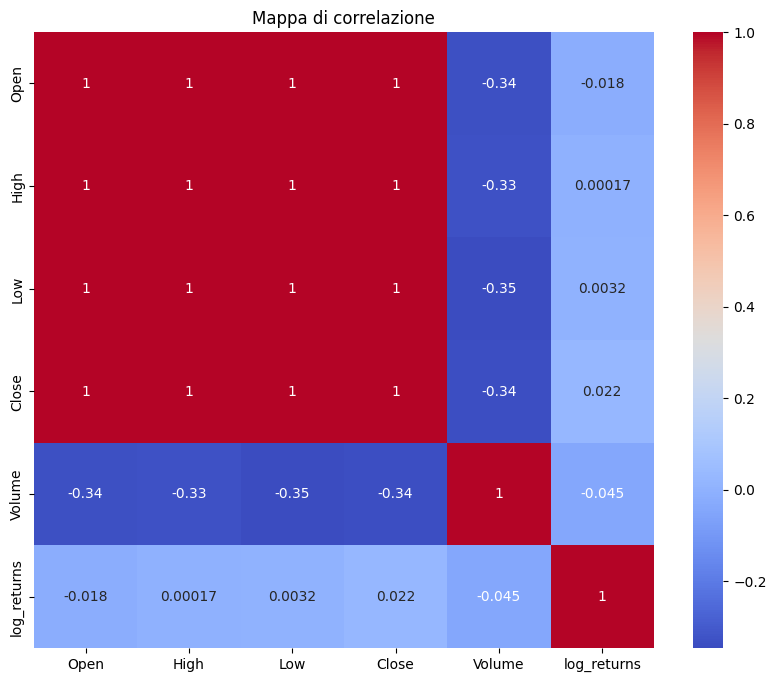

In [12]:
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Mappa di correlazione')
plt.show()

#### Analisi del volume

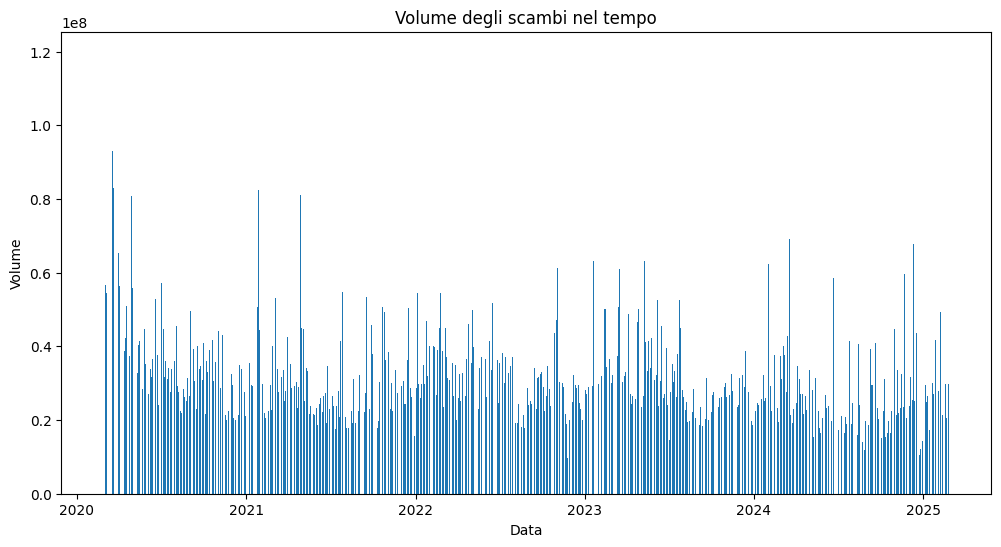

In [14]:
plt.figure(figsize=(12,6))
plt.bar(df['Date'], df['Volume'])
plt.title('Volume degli scambi nel tempo')
plt.xlabel('Data')
plt.ylabel('Volume')
plt.show()

#### Boxplot per individuare outlier

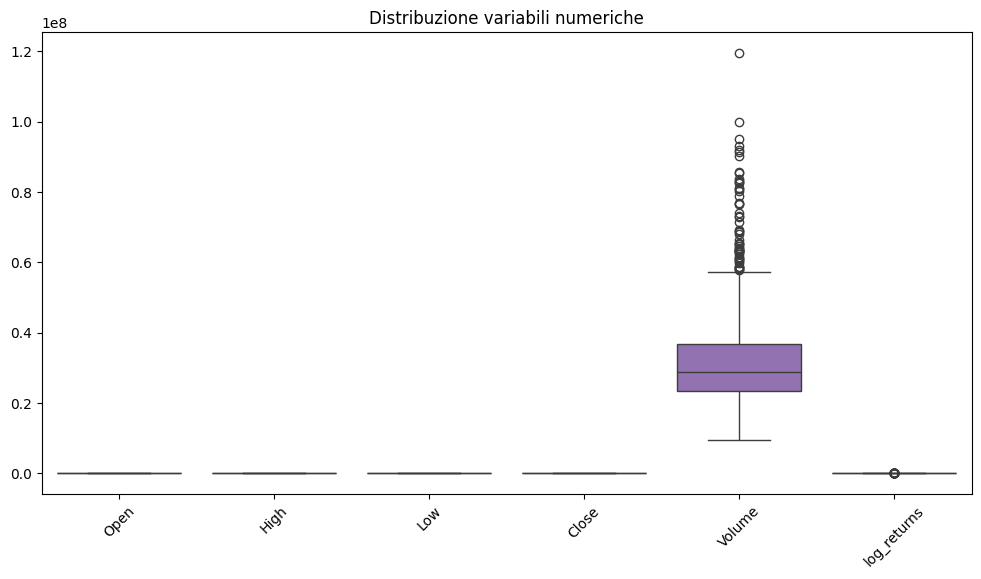

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numeric_cols])
plt.title('Distribuzione variabili numeriche')
plt.xticks(rotation=45)
plt.show()

#### Analisi volatilità

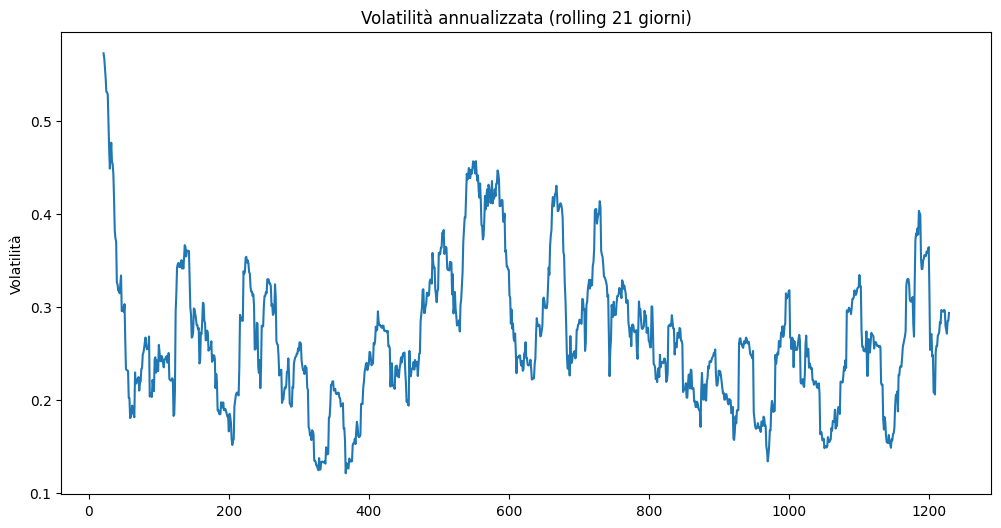

In [16]:
rolling_volatility = df['log_returns'].rolling(window=21).std() * np.sqrt(252)
plt.figure(figsize=(12,6))
rolling_volatility.plot()
plt.title('Volatilità annualizzata (rolling 21 giorni)')
plt.ylabel('Volatilità')
plt.show()